In [206]:
import pandas as pd
import copy

In [3]:
aibnb_data = pd.read_csv("./listings.csv")
aibnb_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,18666,Flat with Sunny Terrace,71615,Mireia And Maria,Sant Martí,el Camp de l'Arpa del Clot,41.40889,2.18555,Entire home/apt,130,3,1,2015-10-10,0.02,30,304
1,18674,Huge flat for 8 people close to Sagrada Familia,71615,Mireia And Maria,Eixample,la Sagrada Família,41.40420,2.17306,Entire home/apt,60,1,20,2019-10-19,0.25,30,312
2,23197,FORUM DELUXE 5 MINS WALK CCIB CENTER & SEA!,90417,Etain (Marnie),Sant Martí,el Besòs i el Maresme,41.41203,2.22114,Entire home/apt,210,3,51,2019-09-29,0.48,2,359
3,25786,NICE ROOM AVAILABLE IN THE HEART OF GRACIA,108310,Pedro,Gràcia,la Vila de Gràcia,41.40145,2.15645,Private room,32,1,268,2019-11-06,2.38,1,46
4,31958,"Gaudi Attic 1, Friendly Rentals",136853,Fidelio,Gràcia,el Camp d'en Grassot i Gràcia Nova,41.40950,2.15938,Entire home/apt,60,1,182,2019-10-16,1.71,39,324


# Lets see rich people!

In [4]:
people_money = {aibnb_data["host_id"][i]:sum(aibnb_data[aibnb_data["host_id"]==aibnb_data["host_id"][i]]["price"] ) for i in range(len(aibnb_data["host_id"]))}

In [22]:
by_cl=[(k,v) for k, v in sorted(people_money.items(), key=lambda item: item[1])]
by_cl.reverse()
for rich in range(len(by_cl)):
    by_cl[rich] = (by_cl[rich],set(aibnb_data[aibnb_data["host_id"]==by_cl[rich][0]]["host_name"]))
by_cl

[((43565515, 215898), {'Homes In Blue'}),
 ((9546928, 88000), {'Gràcia City Hostel'}),
 ((209872731, 84000), {'Two Hotel Barcelona - Adults Only'}),
 ((4459553, 61875), {'Eva&Jack'}),
 ((210452060, 60000), {'Axel Hotel Barcelona - Adults Only'}),
 ((14979846, 60000), {'General Estate'}),
 ((26828317, 50545), {'Isabel'}),
 ((4260952, 50165), {'Marc'}),
 ((102947901, 31104), {'Claudia'}),
 ((155101958, 30000), {'The Streets Apartments'}),
 ((158023606, 24353), {'Sito, Habitat Apartments'}),
 ((54310958, 22977), {'Be Mate'}),
 ((220045133, 21000), {'Happy People'}),
 ((197915127, 20697), {'The Streets Apartments'}),
 ((193618270, 17698), {'Alba'}),
 ((5878688, 16944), {'Yaiza'}),
 ((170716140, 16733), {'Rada & Jacques'}),
 ((214774673, 15900), {'Happy People'}),
 ((268096872, 15875), {'Allianz'}),
 ((198593902, 15000), {'The Streets Apartments'}),
 ((8130906, 13738), {'Arina'}),
 ((299462, 13098), {'Stay U-Nique'}),
 ((171236207, 12696), {'Apartment Barcelona'}),
 ((1447144, 12247), {'Aco

# 1) We want to make a Naive Bayes Classifier that allow us to tell the neighbour where an apartment could be based on its latitude and longitude coordinates, to assign them to some apartments were the owner forget to  upload it. 

To test if its working just train it with 1000 apartments randomly chosen within the whole file, and test it for another different 1000. Which is the accuracy of your predictions.

In [62]:
import sklearn.naive_bayes as NB
import numpy as np

train_set = aibnb_data.sample(1000, random_state=1234)
test_set = pd.concat([aibnb_data, train_set, train_set]).drop_duplicates(keep=False).sample(1000, random_state=1234)
train_set = train_set[["neighbourhood_group","latitude","longitude"]]
gnb = NB.GaussianNB()
y_pred = gnb.fit(train_set[["latitude","longitude"]], train_set[["neighbourhood_group"]]).predict(test_set[["latitude","longitude"]])

print("Number of mislabeled points by a naive bayes assuming gaussian out of a total %d points : %d"% (test_set.shape[0], (np.array(test_set["neighbourhood_group"]) != y_pred).sum()))

Number of mislabeled points by a naive bayes assuming gaussian out of a total 1000 points : 128


/home/jordi/miniconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:206: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [53]:
gnb2 = NB.MultinomialNB()
y_pred2 = gnb2.fit(train_set[["latitude","longitude"]], train_set[["neighbourhood_group"]]).predict(test_set[["latitude","longitude"]])

print("Number of mislabeled points by a naive bayes assuming multinomial out of a total %d points : %d"% (test_set.shape[0], (np.array(test_set["neighbourhood_group"]) != y_pred2).sum()))

Number of mislabeled points by a naive bayes assuming multinomial out of a total 1000 points : 671


/home/jordi/miniconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [66]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

y_pred3 = clf.fit(train_set[["latitude","longitude"]], train_set[["neighbourhood_group"]]).predict(test_set[["latitude","longitude"]])

print("Number of mislabeled points by a decision Tree out of a total %d points : %d"% (test_set.shape[0], (np.array(test_set["neighbourhood_group"]) != y_pred3).sum()))

Number of mislabeled points by a decision Tree out of a total 1000 points : 63


From all Naive Bayes Classifiers, the best performing is the one assuming gaussian distributions. However, even that model is worse than a random tree clasifier(that could be easily outperformed with more complex models such as random forests). This is not unexpected as Naive Bayes Classifiers assumes the variables to be independant while in our case they are not.

# 2) We want to clusterize the apartments according to their prize and room type (1: shared room, 2: private room, 3: hotel room, 4: entire apartment). Plotting different amount of clusters according to this and other features (neighbourhood, availability, minimum nights) can we draw any conclusions?

Example: If we made three clusters we see that we have the cheap ones, usually shared rooms in neighbours like X; the expensive ones, usually entire apartments in touristic places, etc.

## 2.0 Some NaN in the reviews_per_month. Given that there is not a single room with ratio = 0(no comments) I assume NaN = no comments

In [90]:
aibnb_data['reviews_per_month'] = aibnb_data['reviews_per_month'].fillna(0)

## 2.1 Normalize numerical data

In [179]:
from sklearn import preprocessing

x = aibnb_data[['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']].values #returns a numpy array
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
df.columns = ['latitude', 'longitude', 'price',
       'minimum_nights', 'number_of_reviews', 
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365']

In [284]:
def mydist(x,y):
    d=0
    x=list(x)
    y=list(y)
    #print(x)
    #print(y)
    for i in range(len(x)):
        try: # numerical values
            d+=(x[i]-y[i])**2
        except: # not numerical values
            if x[i]!=y[i]:
                d+=1
    return d

def kmeans(data,k=5, n_iter=100, dist = mydist):
    """I will treat categorical data as follows: distance 1 if different categories, 0 if the same category. 
    It is equivalent to transform those varables into booleans indicating if belongs to each category."""
    means = data.sample(k) # I start on a data point selected at random. 
    means =  [x for y, x in means.iterrows()]
    #print(means)
    for ite in range(n_iter):
        groups= [copy.copy([]) for x in range(k)]
        medioids_dist = [copy.copy(99**99) for x in range(k)]# infinite(aprox)
        for index, data_point in data.iterrows():
            min_dist = 99**99 # infinite(aprox)
            for group in range(k):
                nd = dist(data_point,means[group])
                if nd < min_dist:
                    min_dist = nd
                    fg = group
            groups[fg].append(data_point)
        #print("hey ",groups)
        #print(groups)
        ################means = [pd.DataFrame(x).mean(axis=0,numeric_only=False) for x in groups]
        for x in range(k):
            for y in range(len(groups[x][0])):
                try:
                    means[x][y] = np.mean([groups[x][num][y] for num in range(len(groups[x]))]) # numerical values -> mean
                except:
                    means[x][y] = pd.DataFrame([groups[x][num][y] for num in range(len(groups[x]))]).mode()[0][0] #categorical values -> mode
        """for m in means:
            print("-----")
            print(m)
            print("-----")"""
        #print(means)
        #print(means)
    return(groups, means)
    

In [287]:
groups_numerical_values, means = kmeans(df.iloc[:1000])
groups_prize_room_type, means2 = kmeans(pd.concat([df[["price"]], aibnb_data[['room_type']]], axis=1, sort=False).iloc[:1000]) 

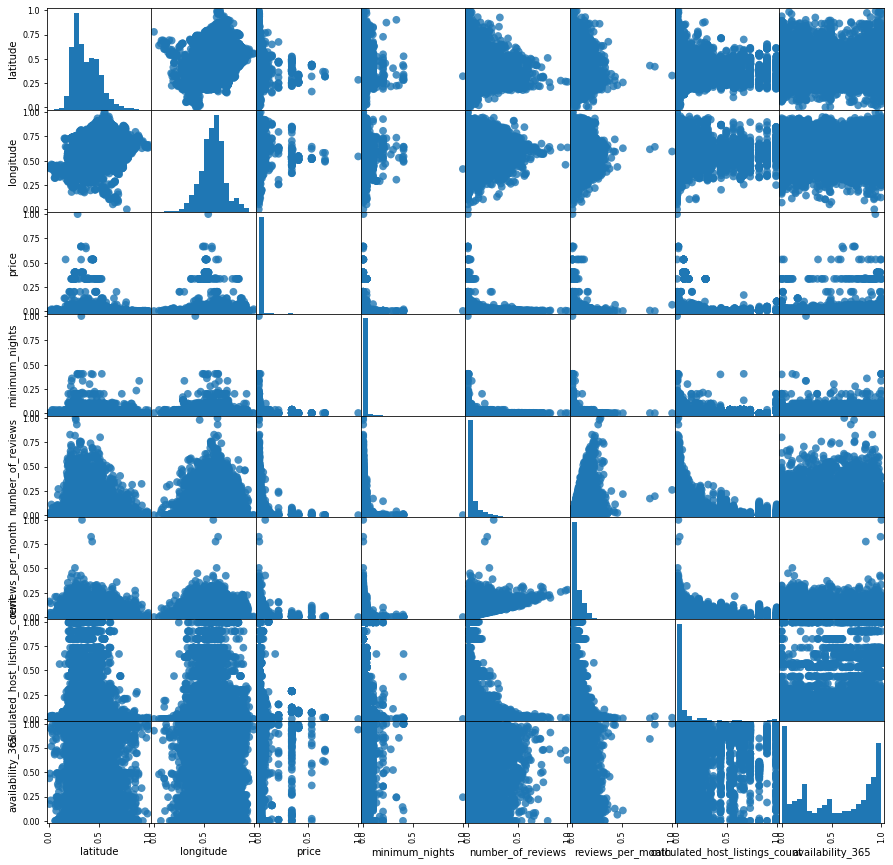

In [180]:
grr = pd.plotting.scatter_matrix(pd.concat([df, aibnb_data[['room_type','neighbourhood_group']]], axis=1, sort=False), figsize=(15, 15), marker='o',
                        hist_kwds={'bins': 20}, s=60, alpha=.8)

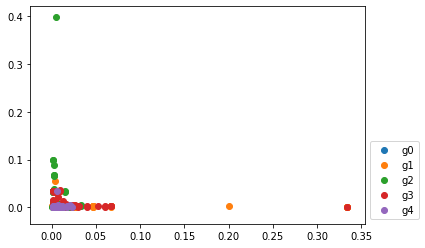

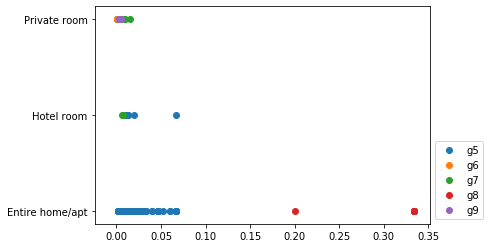

In [288]:
import matplotlib.pyplot as plt
n=0
cols = ["red","green","blue","grey", "magenta"]
plt.figure()
for group in groups_numerical_values:
    plt.scatter(x=[x["price"]for x in group], y=[y["minimum_nights"]for y in group], label="g"+str(n))
    n+=1
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()
plt.figure()
for group in groups_prize_room_type:
    plt.scatter(x=[x["price"]for x in group], y=[y["room_type"]for y in group], label="g"+str(n))
    n+=1
plt.legend(loc=3,bbox_to_anchor=(1,0))
plt.show()



/home/jordi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


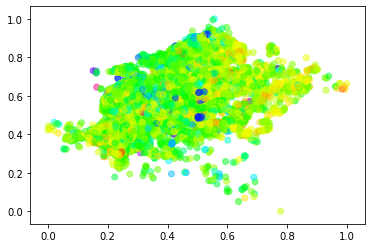

In [300]:
plt.scatter(x=df[["latitude"]], y=df["longitude"],c =[np.log(x*10) for x in df["price"]], cmap='hsv', alpha=0.5) 


The correlations are not clear. There should be some clear correlations as mentioned (room type - price ...) but the obtained groups do not seem to remark it. Maybe the effect is masked by other correlations. If the price is determinded by many different variables the corelation can be harder to determine.